In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
data = np.array([[185,60],[180,62],[180,70],[165,63],[155,68],[170,75],[175,80]])
km = KMeans(n_clusters=3)
km.fit(data)
print(km.labels_)
print(km.predict([[7,7]]))

[2 2 2 1 1 0 0]
[1]


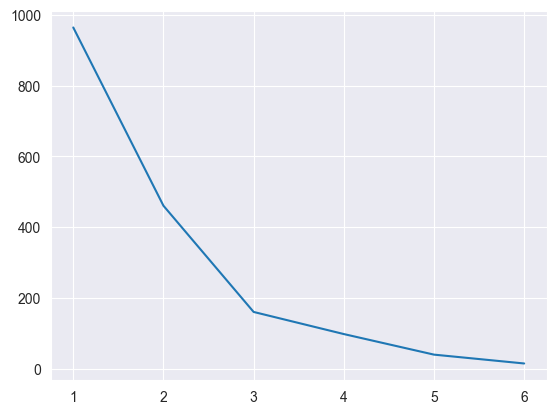

In [3]:
temp = []
for i in range(1,7):
    km=KMeans(n_clusters=i)
    km.fit(data)
    temp.append(km.inertia_)
plt.plot(range(1,7),temp)

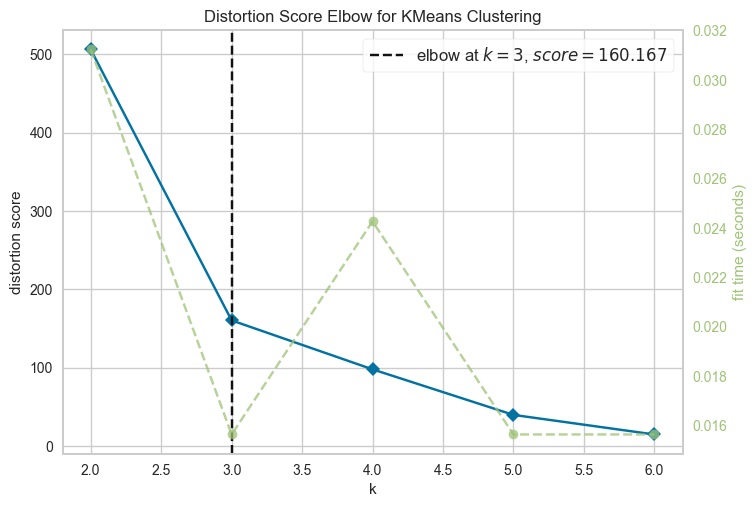

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
data = np.array([[185,60],[180,62],[185,70],[165,63],[155,68],[170,75],[175,80]])
visualizer = KElbowVisualizer(KMeans(),k=(2,7))
visualizer.fit(data)
visualizer.show()

Text(0, 0.5, 'weight')

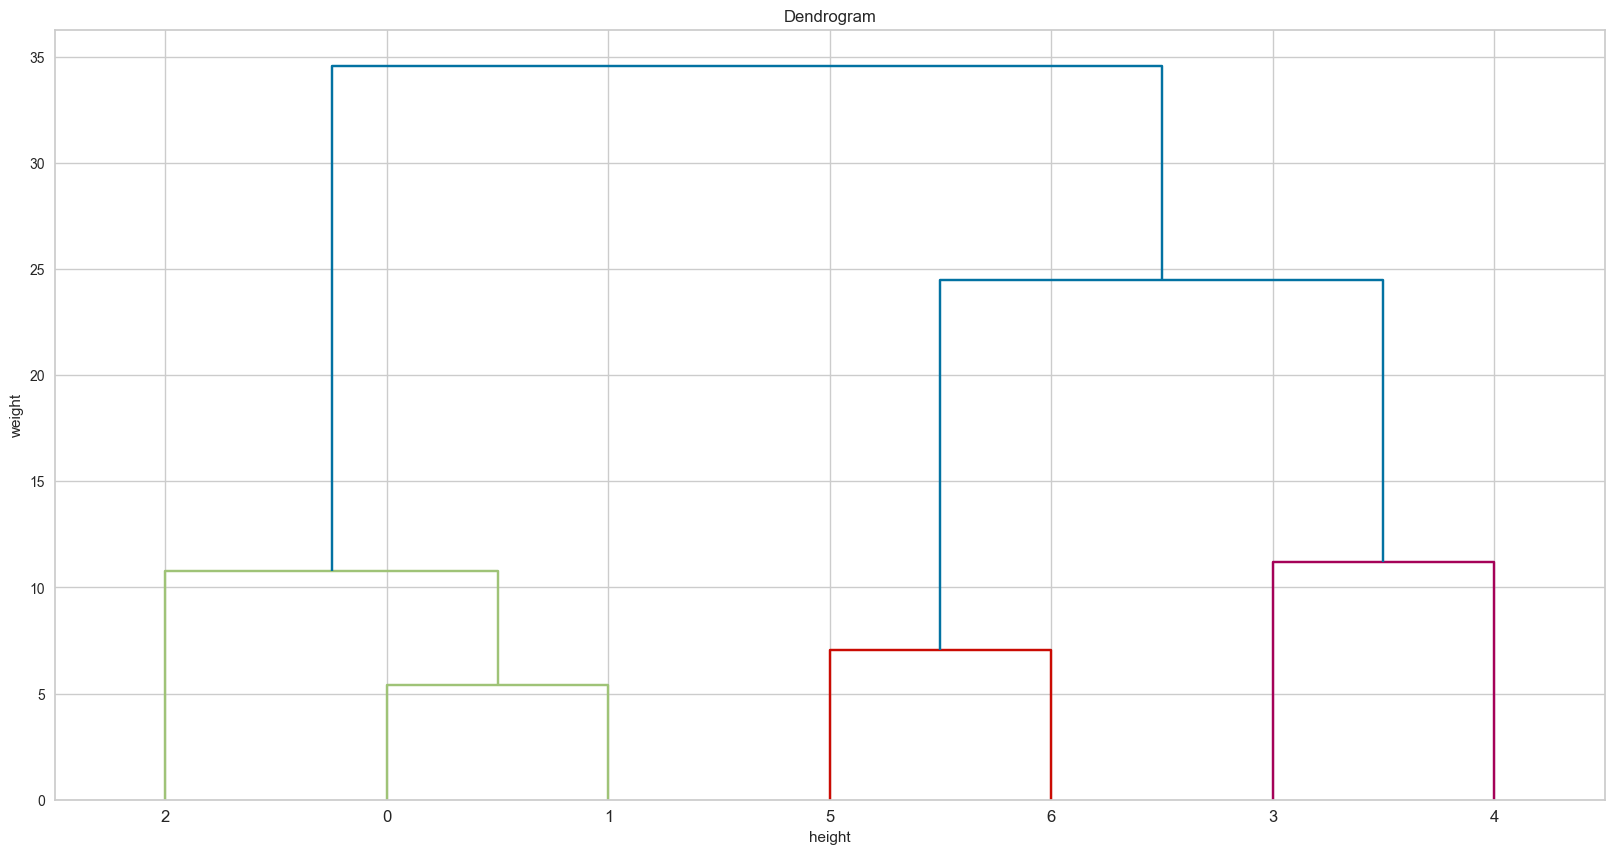

In [8]:
from scipy.cluster.hierarchy import dendrogram,linkage
from matplotlib import pyplot as plt
data = np.array([[185,60],[180,62],[185,70],[165,63],[155,68],[170,75],[175,80]])
plt.figure(figsize=(20,10))
cluster = linkage(data,method='ward')
dendrogram = dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('height')
plt.ylabel('weight')

In [23]:
import pandas as pd
df = pd.read_csv('data/Machine_Learning/chap10_food01.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carbohydrate  4198 non-null   float64
 1   protein       4198 non-null   float64
 2   fat           4198 non-null   float64
 3   salt          4199 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 131.3 KB


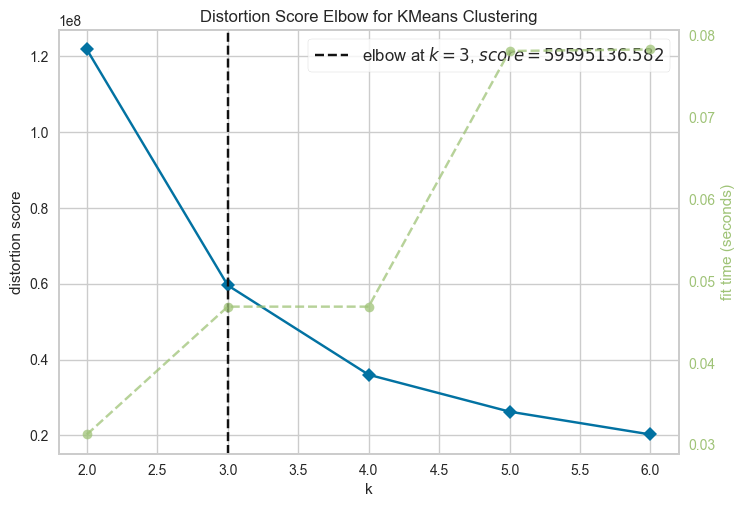

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
df = df.dropna()
data = df[['carbohydrate','protein','fat','salt']].iloc[:,:].values
visualizer = KElbowVisualizer(KMeans(),k=(2,7))
visualizer.fit(data)
visualizer.show()

In [28]:
algorithm = KMeans(n_clusters=4)
algorithm.fit(data)
labels1 = algorithm.labels_
df['label1'] = labels1
df.head()

,carbohydrate,protein,fat,salt,label1
0,97.0,31.0,20.0,1174,0
1,63.0,18.0,9.0,1040,0
2,37.0,13.0,16.0,1291,0
3,60.0,9.0,19.0,1011,0
4,56.0,15.0,11.0,860,0


In [29]:
df['label1'].value_counts()

label1
0    1236
1    1004
3     995
2     963
Name: count, dtype: int64

In [ ]:
df = pd.read_csv('data/Machine_Learning/food02.csv')
df = df.dropna()
data = df[['carbohydrate','protein','fat','salt']].iloc[:,:].values


(4197, 4)


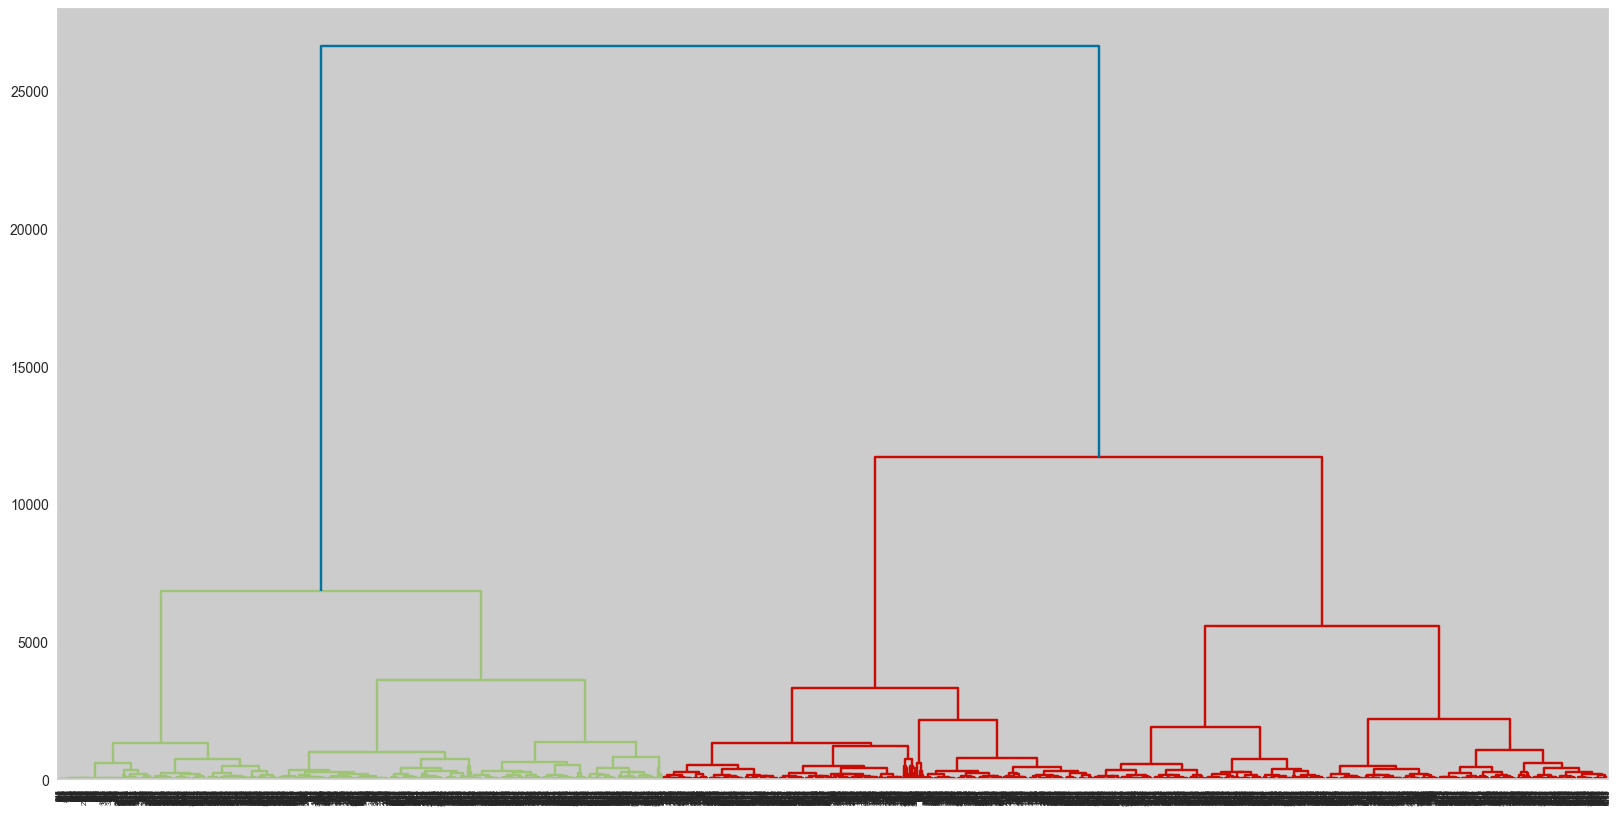

In [30]:
from scipy.cluster.hierarchy import dendrogram,linkage
from matplotlib import  pyplot as plt
plt.figure(figsize=(20,10))
cluster = linkage(data,method='ward')
print(cluster.shape)
dendrogram = dendrogram(cluster)


In [33]:
from sklearn.cluster import AgglomerativeClustering
cluster_model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster_label = cluster_model.fit_predict(data)
df['label2']=cluster_label

In [34]:
df['label2'].value_counts()

label2
0    1635
1    1396
2    1167
Name: count, dtype: int64